In [1]:
# ASTR 400B Homework 6
# separation and relative velocities of the center of mass of 
# the simulated galaxies MW, M31, and M33
# Savannah Smith

In [3]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# modified CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [4]:
def OrbitCOM(galaxy, start, end, n):
    """
    function that loops over all the desired snapshots to compute the 
    COM pos and vel as a function of time

    PARAMETERS:
    ----------
        galaxy: 'str'
            the name of the galaxy (MW, M31, or M33)
        start: 'int'
            the number of the first snapshot to be read in
        end: 'int'
            the number of the last snapshot to be read in
        n: 'int'
            indicates the interval over while the COM will be returned
          
    RETURNS:
    -------
        fileout: .txt file
            text file with the orbital info (t, x, y, z, vx, vy, vz) of COM 
            at specified snapshots
    """
    
    # composing the filename for the output
    fileout = f"Orbit_{galaxy}.txt"
    
    # setting tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = 0.1
    if galaxy == "M33":
        volDec = 4.0  # M33 is stripped more
    else:
        volDec = 2.0  # standard volDec value for other galaxies
    
    # generating the snapshot id sequence
    snap_ids = np.arange(start, end+1, n)
    # checking that the array is not empty but stopping the code if it is empty
    if snap_ids.size == 0:
        print("no snapshots found (invalid input)")
        return
    
    # initializing the array for orbital info: t, x, y, z, vx, vy, vz of COM
    # one row for every value in snap_ids array
    # 7 columns for orbital info of COM
    orbit = np.zeros([len(snap_ids),7]) 
    
    # looping over the txt files within each galaxy folder 
    # each folder is named as the galaxy name (MW, M31, or M33)
    for i, snap_id in enumerate(snap_ids):
        
        # composing the data filename
        ilbl = f"{snap_id:03d}"  # looks at the last three digits of the snapshot file
        filename = f"{galaxy}/{galaxy}_{ilbl}.txt" # folder/file
        
        # initializing an instance of CenterOfMass class
        # number 2 corresponds to disk particles
        COM = CenterOfMass(filename, 2)
        
        # storing the COM positions with new COM_P function
        COM_p = COM.COM_P(delta, volDec)
        # storing the COM velocities
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
    
        # storing the time, position, and velocity in the ith element of the orbit array, 
        # without units (.value)
        # orbit[row,column] so looping through i rows in new text file for every snapshot
        orbit[i,0] = COM.time.to(u.Gyr).value  # Myr in snapshot data but we want Gyr
        orbit[i,1] = COM_p[0].value  # x position
        orbit[i,2] = COM_p[1].value  # y position
        orbit[i,3] = COM_p[2].value  # z position
        orbit[i,4] = COM_v[0].value  # vx
        orbit[i,5] = COM_v[1].value  # vx
        orbit[i,6] = COM_v[2].value  # vx

        # print snap_id to see the progress
        print(f"snapshot: {snap_id}")
        
    # writing the data to a file (don't want to have to repeat this process) 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    print(f"{fileout} saved")

In [7]:
# recovering the orbits and generating the COM files for each galaxy
# reading in 800 snapshots in intervals of n=5 
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

snapshot: 0
snapshot: 5
snapshot: 10
snapshot: 15
snapshot: 20
snapshot: 25
snapshot: 30
snapshot: 35
snapshot: 40
snapshot: 45
snapshot: 50
snapshot: 55
snapshot: 60
snapshot: 65
snapshot: 70
snapshot: 75
snapshot: 80
snapshot: 85
snapshot: 90
snapshot: 95
snapshot: 100
snapshot: 105
snapshot: 110
snapshot: 115
snapshot: 120
snapshot: 125
snapshot: 130
snapshot: 135
snapshot: 140
snapshot: 145
snapshot: 150
snapshot: 155
snapshot: 160
snapshot: 165
snapshot: 170
snapshot: 175
snapshot: 180
snapshot: 185
snapshot: 190
snapshot: 195
snapshot: 200
snapshot: 205
snapshot: 210
snapshot: 215
snapshot: 220
snapshot: 225
snapshot: 230
snapshot: 235
snapshot: 240
snapshot: 245
snapshot: 250
snapshot: 255
snapshot: 260
snapshot: 265
snapshot: 270
snapshot: 275
snapshot: 280
snapshot: 285
snapshot: 290
snapshot: 295
snapshot: 300
snapshot: 305
snapshot: 310
snapshot: 315
snapshot: 320
snapshot: 325
snapshot: 330
snapshot: 335
snapshot: 340
snapshot: 345
snapshot: 350
snapshot: 355
snapshot: 360


C:\Users\savan\CenterOfMass2.py:71: RuntimeWarning: invalid value encountered in scalar divide
  a_com = np.sum(a * m) / np.sum(m)
C:\Users\savan\CenterOfMass2.py:73: RuntimeWarning: invalid value encountered in scalar divide
  b_com = np.sum(b * m) / np.sum(m)
C:\Users\savan\CenterOfMass2.py:75: RuntimeWarning: invalid value encountered in scalar divide
  c_com = np.sum(c * m) / np.sum(m)


snapshot: 440
snapshot: 445
snapshot: 450
snapshot: 455
snapshot: 460
snapshot: 465
snapshot: 470
snapshot: 475
snapshot: 480
snapshot: 485
snapshot: 490
snapshot: 495
snapshot: 500
snapshot: 505
snapshot: 510
snapshot: 515
snapshot: 520
snapshot: 525
snapshot: 530
snapshot: 535
snapshot: 540
snapshot: 545
snapshot: 550
snapshot: 555
snapshot: 560
snapshot: 565
snapshot: 570
snapshot: 575
snapshot: 580
snapshot: 585
snapshot: 590
snapshot: 595
snapshot: 600
snapshot: 605
snapshot: 610
snapshot: 615
snapshot: 620
snapshot: 625
snapshot: 630
snapshot: 635
snapshot: 640
snapshot: 645
snapshot: 650
snapshot: 655
snapshot: 660
snapshot: 665
snapshot: 670
snapshot: 675
snapshot: 680
snapshot: 685
snapshot: 690
snapshot: 695
snapshot: 700
snapshot: 705
snapshot: 710
snapshot: 715
snapshot: 720
snapshot: 725
snapshot: 730
snapshot: 735
snapshot: 740
snapshot: 745
snapshot: 750
snapshot: 755
snapshot: 760
snapshot: 765
snapshot: 770
snapshot: 775
snapshot: 780
snapshot: 785
snapshot: 790
snapsh

In [9]:
# reading in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_data = np.genfromtxt('Orbit_MW.txt')
M31_data = np.genfromtxt('Orbit_M31.txt')
M33_data = np.genfromtxt('Orbit_M33.txt')

# storing the data for each variable
# 7 columns: t, x, y, z, vx, vy, vz

# for MW:
MW_t = MW_data[:,0]

MW_x = MW_data[:,1]
MW_y = MW_data[:,2]
MW_z = MW_data[:,3]
MW_p = [MW_x, MW_y, MW_z]

MW_vx = MW_data[:,4]
MW_vy = MW_data[:,5]
MW_vz = MW_data[:,6]
MW_v = [MW_vx, MW_vy, MW_vz]

# for M31:
M31_t = M31_data[:,0]

M31_x = M31_data[:,1]
M31_y = M31_data[:,2]
M31_z = M31_data[:,3]
M31_p = [M31_x, M31_y, M31_z]

M31_vx = M31_data[:,4]
M31_vy = M31_data[:,5]
M31_vz = M31_data[:,6]
M31_v = [M31_vx, M31_vy, M31_vz]

# for M33:
M33_t = M33_data[:,0]

M33_x = M33_data[:,1]
M33_y = M33_data[:,2]
M33_z = M33_data[:,3]
M33_p = [M33_x, M33_y, M33_z]

M33_vx = M33_data[:,4]
M33_vy = M33_data[:,5]
M33_vz = M33_data[:,6]
M33_v = [M33_vx, M33_vy, M33_vz]


In [11]:
# function to compute the magnitude of the difference between two vectors 
# using this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def VectorMagnitude(obj1, obj2):
    '''
    function computes the magnitude of the difference between two 3-dimensional vectors

    PARAMETERS:
    ----------
        obj1: '3-dimensional array of floats or astropy quantities'
            position/velocity vector of the first object
        obj2: '3-dimensional array of floats or astropy quantities'
            position/velocity vector of the second object

    RETURNS:
    -------
        mag: 'float or astropy quantity'
            magnitude of the difference between the two vectors
    '''

    # finding the distance between each vector for the x, y, and z direction
    x_diff = obj1[0] - obj2[0]
    y_diff = obj1[1] - obj2[1]
    z_diff = obj1[2] - obj2[2]

    # computing the magnitude of the differences
    mag = np.sqrt( (x_diff**2) + (y_diff**2) + (z_diff**2) )
    return mag


In [13]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
r_MW_M31 = VectorMagnitude(MW_p, M31_p)
v_MW_M31 = VectorMagnitude(MW_v, M31_v)

# of M33 and M31
r_M31_M33 = VectorMagnitude(M31_p, M33_p)
v_M31_M33 = VectorMagnitude(M31_v, M33_v)


In [15]:
# I am encountering errors with my plotting
# it seems that my output file for M33 had nan values at random times
# will fix code to correct for these issues

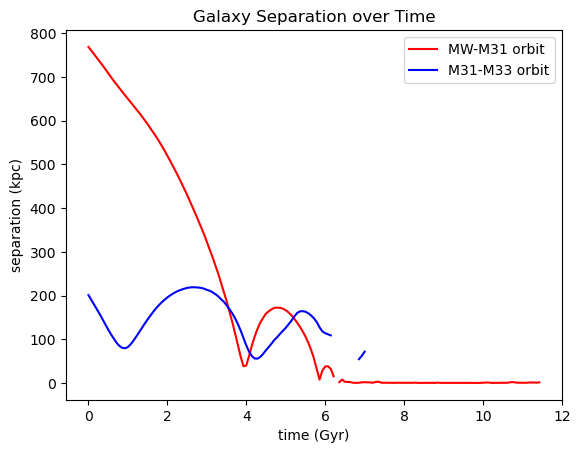

In [17]:
# Plot the Orbit of the galaxies 
#################################

plt.title('Galaxy Separation over Time')
plt.xlabel('time (Gyr)')
plt.ylabel('separation (kpc)')
plt.plot(MW_t, r_MW_M31, color='red', label='MW-M31 orbit')
plt.plot(M31_t, r_M31_M33, color='blue', label='M31-M33 orbit')
plt.legend()
plt.show()


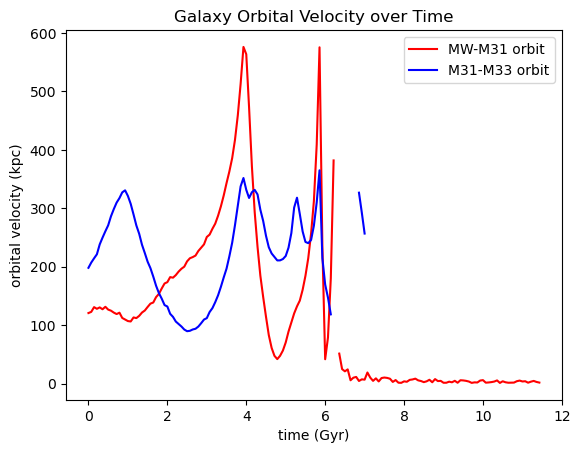

In [19]:
# Plot the orbital velocities of the galaxies 
#################################

plt.title('Galaxy Orbital Velocity over Time')
plt.xlabel('time (Gyr)')
plt.ylabel('orbital velocity (kpc)')
plt.plot(MW_t, v_MW_M31, color='red', label='MW-M31 orbit')
plt.plot(M31_t, v_M31_M33, color='blue', label='M31-M33 orbit')
plt.legend()
plt.show()


In [21]:
# section 4: questions

In [ ]:
'''
1. How many close encounters will the MW and M31 experience in the future?

It appears that there will be 3 close encounters between the MW and M31 in the future.
To see this, we can look at the red line of the separation plot and looking at the 
minima of the plot.

2. How is the time evolution of the separation and relative velocity related?

Whenever the separation between the galaxy pairs is lowest, the orbital velocity of the
galaxy pair is greatest and whenever the separation is greatest, the orbital velocity
is lowest. The separation and the orbital velocity continue to increase and decrease 
opposite to each other.

4. BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr 
(ratio of the difference between two successive apocenters and the orbital period; 
you don’t need to be precise). If this rate is constant, how long will it take M33 to merge 
with the combined MW+M31 remnant if it is at a distance of 75 kpc?

'''

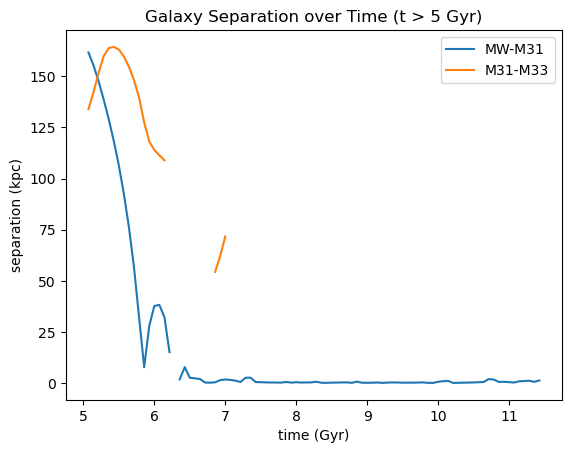

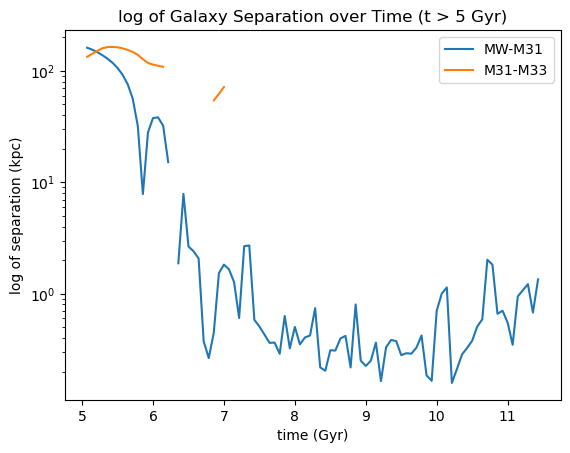

In [23]:
'''
3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y axis). 
What happens to M33’s orbit when they merge?
'''

# checking for when the MW and M31 merge
# when the galaxies merge, their separation will be small
# zoom on times greater than 5 Gyr
mask = np.where(MW_t > 5.0)[0]  # the last major encounter is a little after 4 Gyr

plt.title('Galaxy Separation over Time (t > 5 Gyr)')
plt.xlabel('time (Gyr)')
plt.ylabel('separation (kpc)')
plt.plot(MW_t[mask], r_MW_M31[mask], label='MW-M31')
plt.plot(M31_t[mask], r_M31_M33[mask], label='M31-M33')
plt.legend()
plt.show()

plt.title('log of Galaxy Separation over Time (t > 5 Gyr)')
plt.xlabel('time (Gyr)')
plt.ylabel('log of separation (kpc)')
plt.semilogy(MW_t[mask], r_MW_M31[mask], label='MW-M31')
plt.semilogy(M31_t[mask], r_M31_M33[mask], label='M31-M33')
plt.legend()
plt.show()